In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                             silhouette_score, davies_bouldin_score,silhouette_samples)
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [31]:
df = pd.read_csv('../data/trabajo1.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


# Are employees promoted by their previous year rating and average training score?

<AxesSubplot:xlabel='previous_year_rating', ylabel='avg_training_score'>

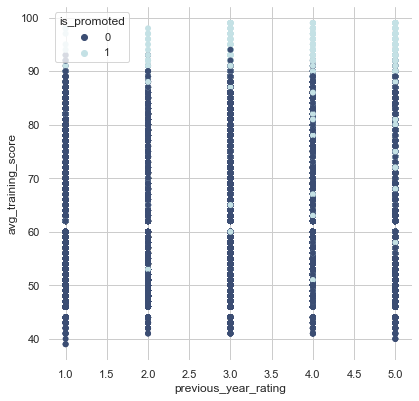

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")



# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="previous_year_rating", y="avg_training_score",
                hue="is_promoted", 
                palette="ch:r=-.2,d=.3_r",
                 linewidth=0,
                data=df, ax=ax)

# Does the level of education impact on promotions?

KeyboardInterrupt: 

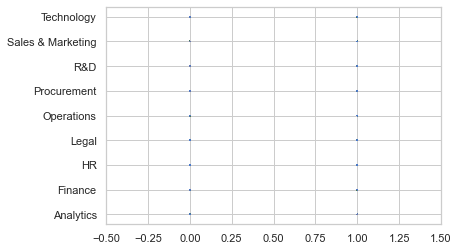

In [35]:
sns.set_theme(style="whitegrid", palette="muted")
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="gender", y="department", hue="is_promoted", s=1)
ax.set(ylabel="")

# Does age affect promotions in each department?


<AxesSubplot:xlabel='department', ylabel='age'>

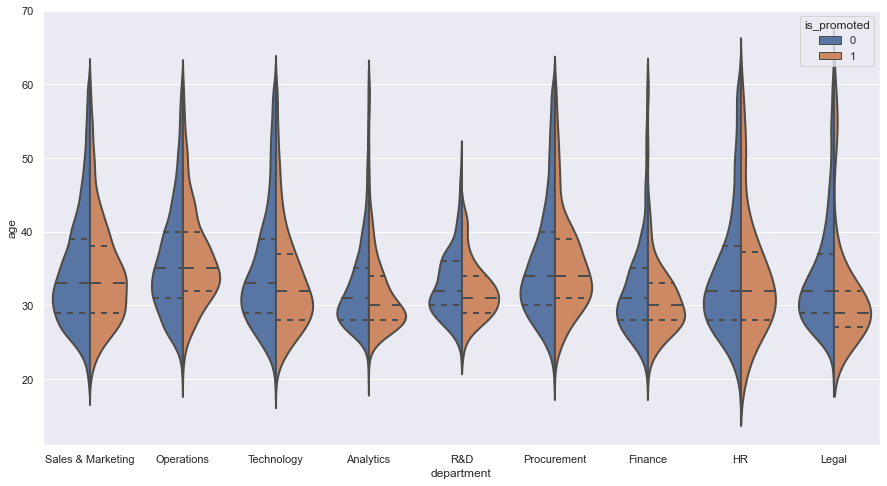

In [50]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})



# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="department", y="age", hue="is_promoted",
               split=True, inner="quart", linewidth=2)

# Training score - number of trainings  (is promoted)

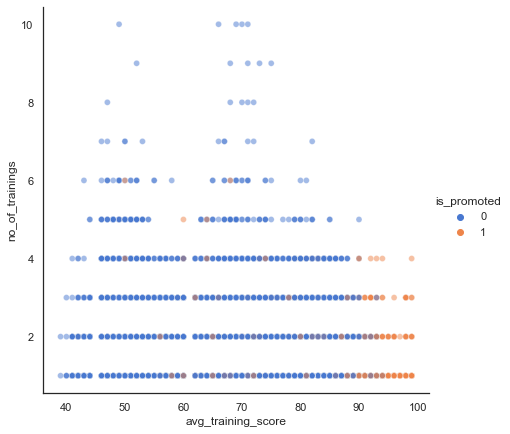

In [60]:
sns.set_theme(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="avg_training_score", y="no_of_trainings", hue="is_promoted",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# Does the level of education impact on promotions?

In [85]:
df['education'] = df['education'].replace(np.nan, 'No education')

In [86]:
education_levels = df['education'].unique()

In [88]:
education_levels

array(["Master's & above", "Bachelor's", 'No education',
       'Below Secondary'], dtype=object)

In [89]:
values_masters = (df[df["education"] == "Master's & above"]["is_promoted"].value_counts())

go.Box(
        y=values,
        name='Premios si tienen master',
        marker_color='green',
        showlegend = False,
         boxpoints = "all"
    )


Box({
    'boxpoints': 'all',
    'marker': {'color': 'green'},
    'name': 'Premios si tienen master',
    'showlegend': False,
    'y': array([14582,   343])
})

In [90]:
values_masters[1]

1471

In [91]:
values_bachelor = (df[df["education"] == "Bachelor's"]["is_promoted"].value_counts())
                   
values_bachelor[1]



3008

In [92]:
values_below_secondary = (df[df["education"] == "Below Secondary"]["is_promoted"].value_counts())
                   
values_below_secondary[1]

67

In [106]:
values_no_education = (df[df["education"] == "No education"]["is_promoted"].value_counts())
                   
values_no_education[1]

122

In [105]:
122+67+3008+1471

4668

In [104]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
values_bachelor_male= (df[df["education"] == "Bachelor's"]["is_promoted"].value_counts())
                   
values_bachelor[1]



<AxesSubplot:ylabel='is_promoted'>

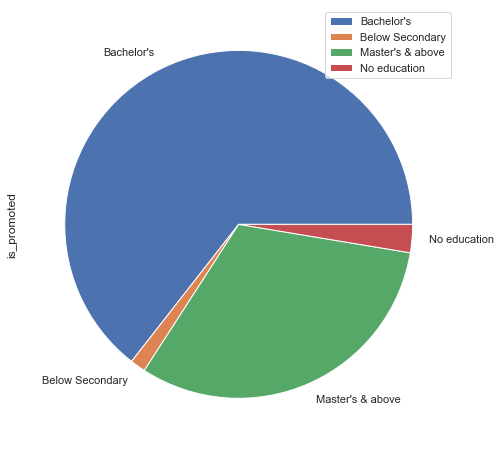

In [107]:
df.groupby(['education']).sum().plot(kind='pie', y='is_promoted')

# Average training score by education level?


AttributeError: 'bool' object has no attribute 'all'

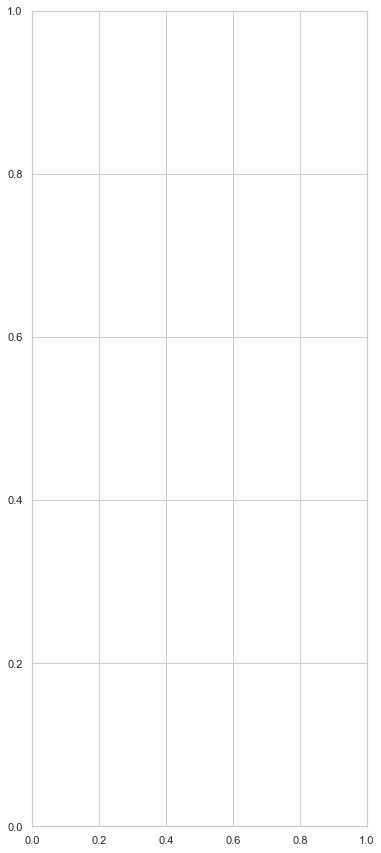

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x=df['awards_won'].count(), y=df['department'].unique(),
            label="Total", color="b")


In [16]:
df['awards_won'].count()

54808

In [18]:
values = (df[df["department"].unique()]["awards_won"].value_counts()).values

KeyError: "None of [Index(['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D',\n       'Procurement', 'Finance', 'HR', 'Legal'],\n      dtype='object')] are in the [columns]"

# VER PROMOCION POR GENERO Y PREVIOUS YEAR RATING (NO CARGA)

KeyboardInterrupt: 

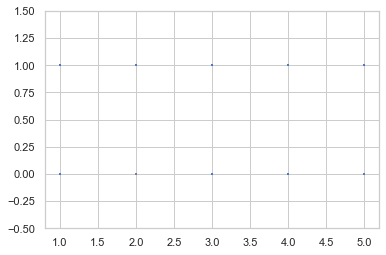

In [34]:
#NO CARGA
sns.set_theme(style="whitegrid", palette="muted")
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="previous_year_rating", y="gender", hue="is_promoted", s=1)
ax.set(ylabel="")